In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from regression import Linear_Regression

In [2]:
def format_date(date):
    one_year = 3.1536e16
    date_str = str(pd.to_datetime((date-1970)*one_year)).split()[0]
    dates = pd.to_datetime(date_str)
    return dates

In [3]:
def wrangle(filename):
    df = pd.read_csv(filename)
    df['transaction date'] = df['X1 transaction date'].apply(lambda x: format_date(x))
    df.drop(['X1 transaction date','No'],axis=1,inplace =True)
    df = df.set_index('transaction date').sort_index()
    return df

In [4]:
df = wrangle('Real estate valuation data set.csv')

In [5]:
df.head()

X2 house age  X3 distance to the nearest MRT station  \
transaction date                                                         
2012-08-21                12.6                                383.2805   
2012-08-21                33.4                                186.9686   
2012-08-21                29.1                                506.1144   
2012-08-21                15.6                                289.3248   
2012-08-21                34.9                                179.4538   

                  X4 number of convenience stores  X5 latitude  X6 longitude  \
transaction date                                                               
2012-08-21                                      7     24.96735     121.54464   
2012-08-21                                      6     24.96604     121.54211   
2012-08-21                                      4     24.97845     121.53889   
2012-08-21                                      5     24.98203     121.54348   
2012-08-21                                      8     24.97349     121.54245   

                  Y house price of unit area  
transaction date                              
2012-08-21                              42.5  
2012-08-21                              42.2  
2012-08-21                              40.3  
2012-08-21                              46.1  
2012-08-21                              39.7

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 414 entries, 2012-08-21 to 2013-07-21
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X2 house age                            414 non-null    float64
 1   X3 distance to the nearest MRT station  414 non-null    float64
 2   X4 number of convenience stores         414 non-null    int64  
 3   X5 latitude                             414 non-null    float64
 4   X6 longitude                            414 non-null    float64
 5   Y house price of unit area              414 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 22.6 KB


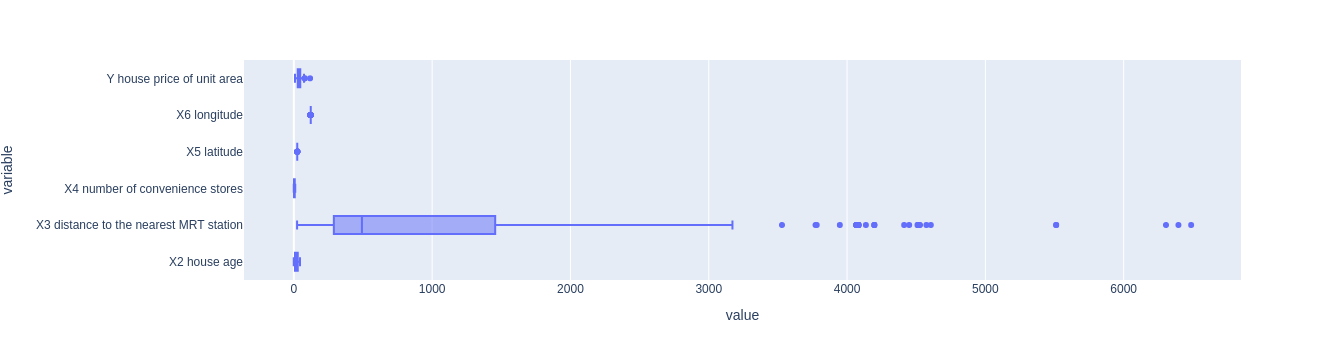

In [7]:
px.box(df,orientation='h')

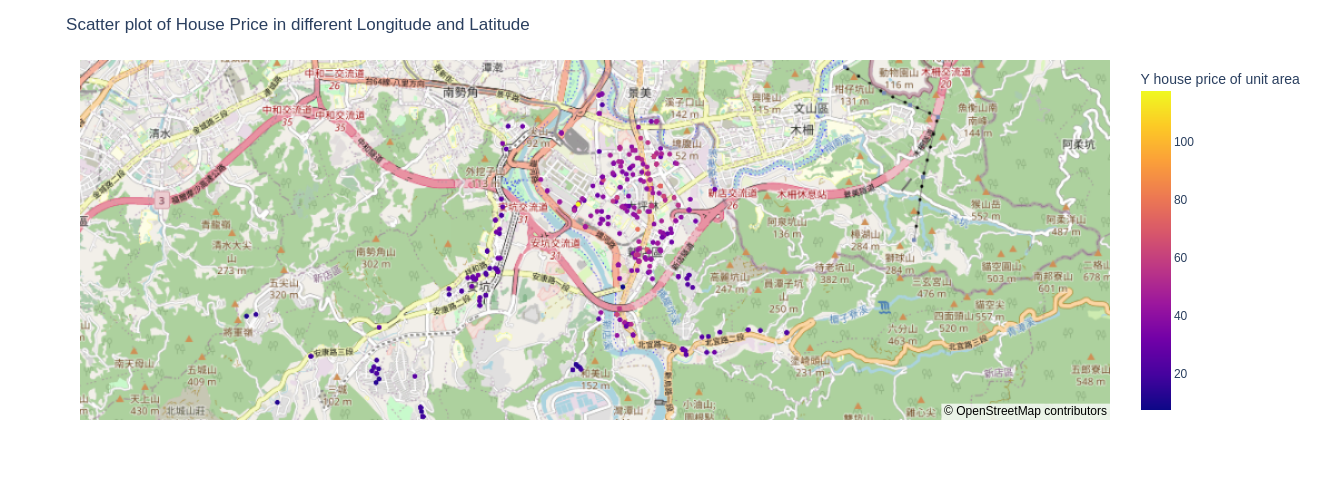

In [8]:
fig = px.scatter_mapbox(df,lat='X5 latitude',lon='X6 longitude',width=1000,height=500,color='Y house price of unit area',
                                    hover_data=['Y house price of unit area'],zoom=12)
fig.update_layout(mapbox_style="open-street-map",title='Scatter plot of House Price in different Longitude and Latitude')
fig.show();

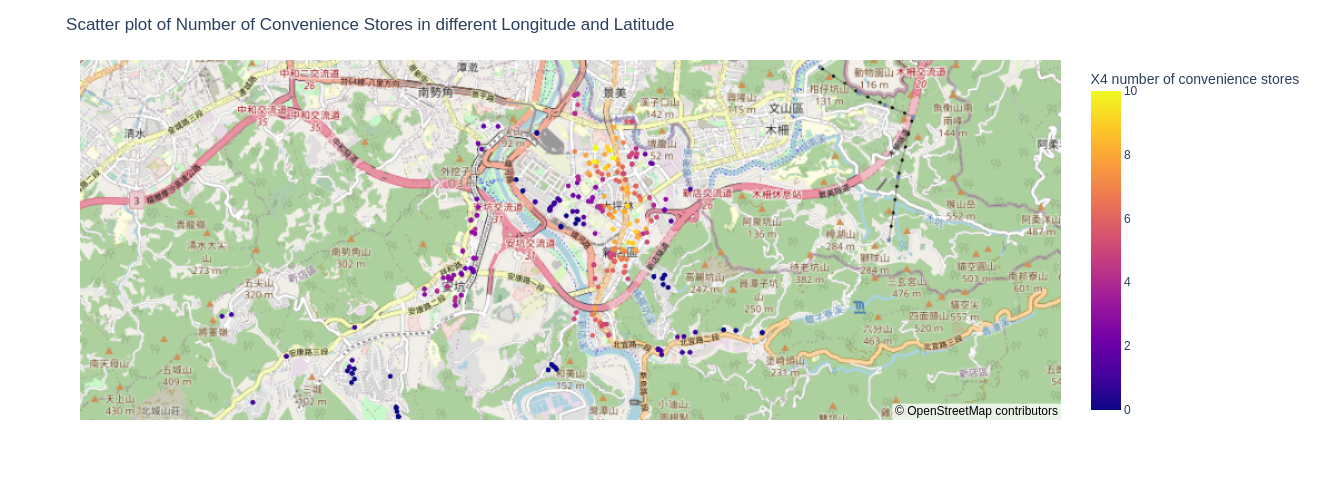

In [9]:
fig = px.scatter_mapbox(df,lat='X5 latitude',lon='X6 longitude',width=1000,height=500,color='X4 number of convenience stores',
                                    hover_data=['X4 number of convenience stores'],zoom=12)
fig.update_layout(mapbox_style="open-street-map",title='Scatter plot of Number of Convenience Stores in different Longitude and Latitude')
fig.show();

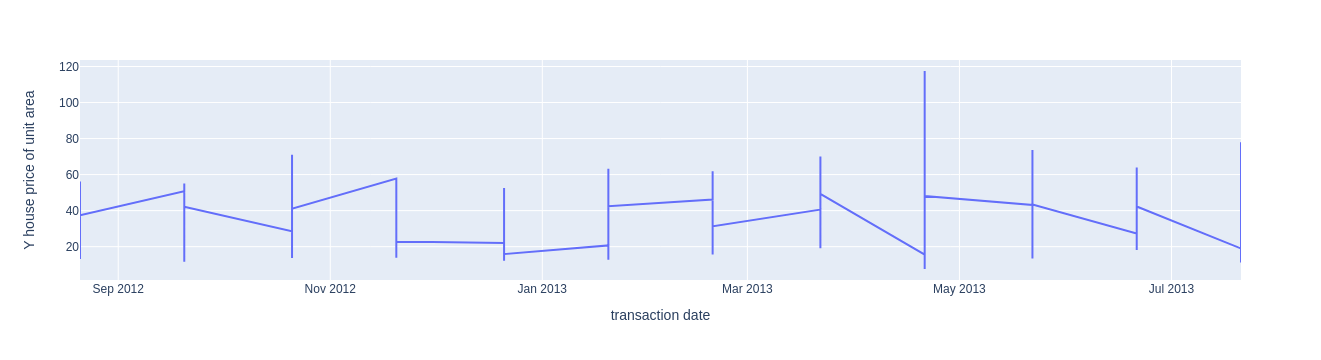

In [10]:
px.line(df,y='Y house price of unit area')

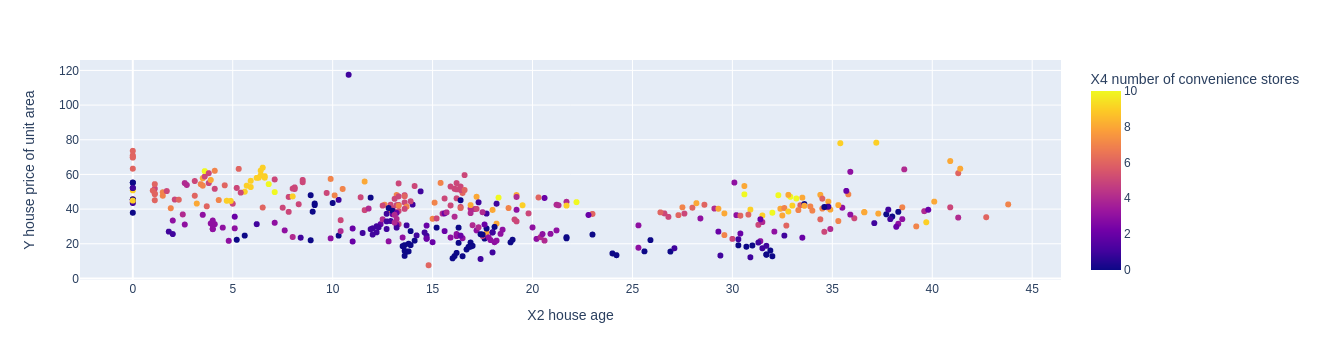

In [11]:
px.scatter(df,x='X2 house age',y='Y house price of unit area',color='X4 number of convenience stores')

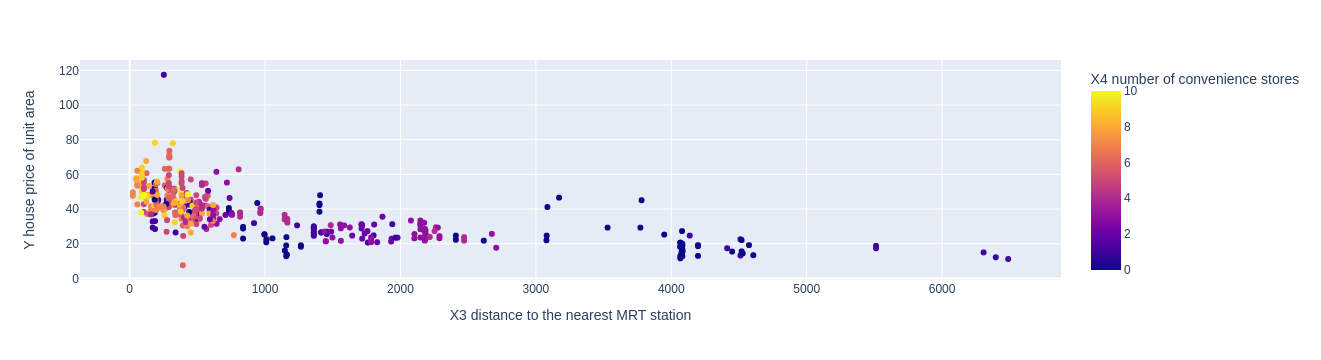

In [12]:
px.scatter(df,x='X3 distance to the nearest MRT station',y='Y house price of unit area',color='X4 number of convenience stores')

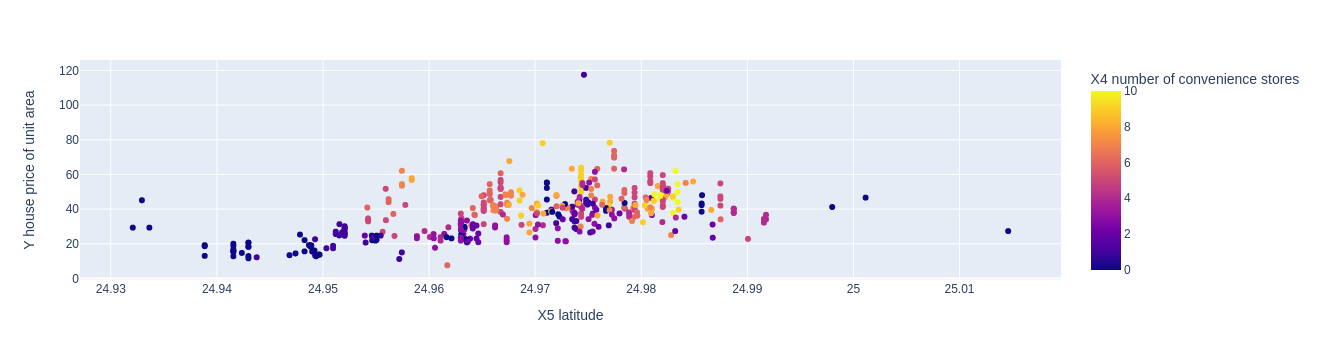

In [13]:
px.scatter(df,x='X5 latitude',y='Y house price of unit area',color='X4 number of convenience stores')

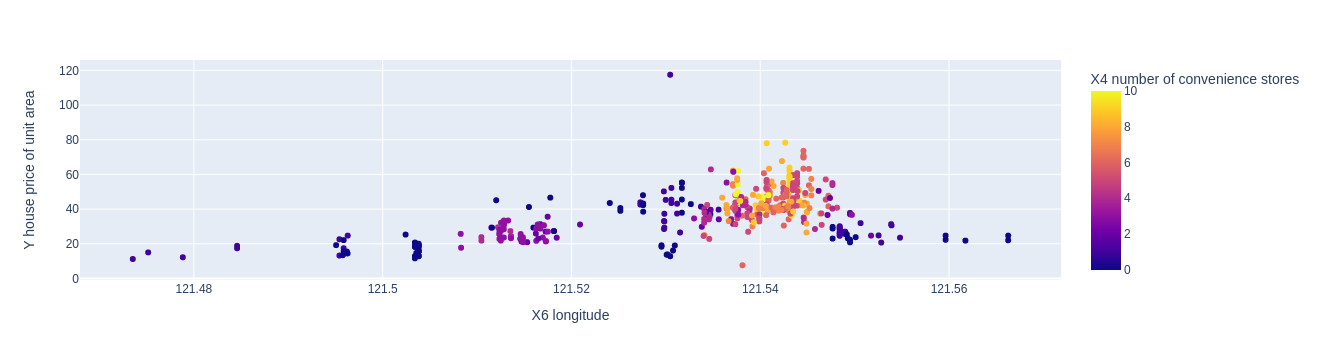

In [14]:
px.scatter(df,x='X6 longitude',y='Y house price of unit area',color='X4 number of convenience stores')

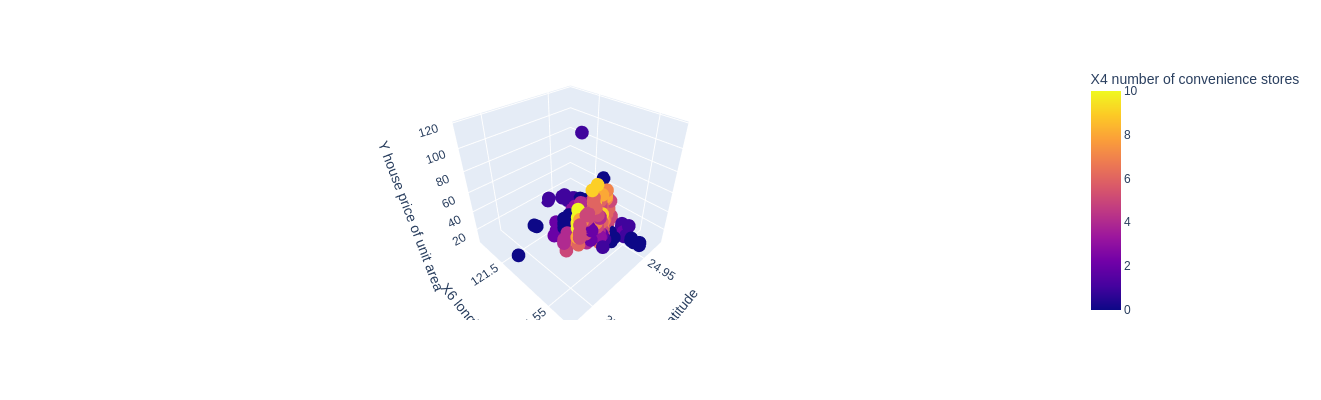

In [15]:
px.scatter_3d(df,x='X5 latitude',y='X6 longitude',z='Y house price of unit area',color='X4 number of convenience stores',width=600,height=400)

In [16]:
target = 'Y house price of unit area'
X = df.drop(target,axis=1)
y=df[target]

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
model = make_pipeline(StandardScaler(),Linear_Regression())
model.fit(X_train,y_train)
y_pred = model.predict(X_train)

In [19]:
y_baseline = len(y_train)*[y_train.mean()] 
mean_absolute_error(y_train,y_baseline)

10.691450424877463

In [20]:
model.named_steps['linear_regression'].coef_

In [21]:
mean_absolute_error(y_train,y_pred)

6.082821242089323

In [22]:
y_test_pred = model.predict(X_test)
mean_absolute_error(y_test,y_test_pred)

6.652956643449187